# Расчет распределения давления в нагнетательной скважине. Описание алгоритма

Динамическое забойное давление в нагнетательной скважине может быть получено при помощи уравнения Дарси-Вейсбаха

$$P_{wf} = P_{wh} + \xi \left [ \rho g L \cos \alpha  - \frac{8}{\pi^2} \frac{ f \rho }{ d^5} q ^ 2 L \right ] $$

$P$ - давление

$P_{wf}$ - забойное давление

$P_{wh}$ - устьевое давление

$\rho$ - плотность воды, кг/м3

$g$ - ускорение свободного падения, кг/м/с2

$\alpha$ - угол отклонения скважины от вертикали, рад

$L$ - измеренная длина скважины, м

$d$ - диаметр скважины, м

$q$ - дебит закачиваемой жидкости, м3/сек

$\mu$ - вязкость динамическая, мПа с

$T$ - температура, К

$\xi$ - размерный коэффициент зависящий от выбора системы единиц. При использовании единиц давления в $МПа$ $\xi = \frac{1}{10^6}$, при использовании единиц давления в $бар$ $\xi = \frac{1}{10^5}$.

Градиент давления для произвольного участка скважины можно записать в виде

$$ \frac{dP}{dL} = \xi \left [ \rho g  \cos \alpha  - 0.815 \frac{f \rho}{d^5} q ^ 2 \right ] $$

Что

Таблица параметров и единиц измерения

|Параметр | СИ   | Практические метрические  | Промыслоавые американские    |
|------   |:------:|:------: |:------:|
|Давление |$Па$    | $Атм$ | $psi$  |
|Температура |${^\circ K}$    | ${^\circ C}$  | ${^\circ F}$  |
|Плотность |$кг / м^3$    | $кг / м^3$ | $кг / м^3$  |
|Ускорение свободного падения |$м / с^2$    | $м / с^2$ | $м / с^2$  |
|Длина |$м$    | $м$ | $ft $ |
|Дебит |$м^3 / с$   | $м^3 / сут$ | $bbl / day$  |
|Вязкость |$Па \cdot с$    | $сП$ | $сП$ |


## Корреляция для плотности воды
Плотность воды существенно зависит от количества растворенных в воде солей. При известной солености воды $w_s$ плотность воды в стандартных условиях может быть определена по корреляции

$$\rho_w (P_{sc}, T_{sc} ) = (1,0009 - 0.7114 W_s + 0.2605 * W_s ^2) ^ {-1} $$

А изменение плотность воды с изменение температуры может быть рассчитано по выражению

$$\rho_w (P, T ) = \frac{\rho_w (P_{sc}, T_{sc} )} {1+ \frac{ T-273}{10000}(0.269 (T-273)^{0.637}-0.8)} $$

Влиянием давления на плотность воды (сжимаемостью) можно пренебречь. Сжимаемость воды составляет около $4.5 \cdot 10^{-5} \frac{1}{bar} $. При изменении давления в 100 раз (с 1 до 100) плотность воды изменится примерно на 0.05%.

[Соленость](https://en.wikipedia.org/wiki/Salinity) (массовая доля солей) определяется как  $$W_s = \frac{m_s}{m_s+m_w}$$

$m_s$ - масса солей, г

$m_w$ - масса воды, г

Часто определяется от отношение солей в граммка к массе воды в килограммах (или грамм на литр). Иногда встречаются значения солености в частицах на миллион (ppm) или в процентах.

$$1 \% = 0.01 \left [ \frac{г}{г}   \right ] = 10  \left [ \frac{г}{кг} \right ] = 10  \left [ \frac{г}{л} \right ] = 10000  \left [ ppm \right ]$$


Типичные значения солености составляют

| Вода | Соленость, г/г   |
|------|------|
|   чистая   | 0.00001-0.001|
|   морская вода   | 0.035|
|   вода мертвого моря   | >0.2|

Часто на промысле значение солености не известно (не содержится в базе данных), удобнее бывает ориентироваться на плотность воды в стандартных условиях.
При известной плотности воды в стандартных условиях значение солености можно оценить из выражения (обратного выражению для плотности)

$$ W_s = \frac{1}{\rho_w}  \left( 1.36545 \rho_w - (3838.77 \rho_w - 2.009 \rho_w ^2 )^{0.5} \right) $$

Для $\rho_w > 992 \frac{кг}{м^3}$

## Корреляция для расчета вязкости воды

Вязкость воды может быть рассчитана по корреляции Matthews and Russel

$$ \mu_w= A  (1.8  T - 460) ^ {-B}  (0.9994 + 0.0058  P + 0.6534 \cdot  10 ^ {- 4} \cdot P^2 ) $$

где

$$A = 109.574 - 0.8406 \cdot 1000  W_s + 3.1331 \cdot 1000  W_s ^2 + 8.7221 \cdot 1000  W_s ^3$$

$$B = 1.1217 - 2.6396  W_s + 6.7946  W_s ^2 + 54.7119  W_s ^ 3 - 155.586  W_s ^4$$

## Число Рейнольдса

Число Рейнольдса определяется выражением

$$ Re = \frac{\rho V d}{\mu}$$

Для нагнетательной скважины диаметром 89 мм зависимость числа Рейнольдса от дебита приведена на рисунке в расчетной части. Видно, что уже при дебитах более 3 м3/сут $Re > 3000$ и поток будет турбулентным

## Коэффициент трения

Коэффициент трения Муди $f$ расчитывается для ламинарного потока по формуле

$$ f= \frac{64}{Re}, Re < 3000 $$

При закачке воды поток не бывает ламинарным (для НКТ с внутренним диаметром 89 мм дебит воды при котором нарушается ламинарность потока составляет около 3 м3/сут)
Для турбулентного режима течения $ Re > 3000 $ коэффициент трения Муди может быть рассчитан по Джейн (3. Swamee, P.K.; Jain, A.K. (1976). "Explicit equations for pipe-flow problems". Journal of the Hydraulics Division. 102 (5): 657–664)

$$ f = \frac{1} {\left [  1.14 - 2  \log \left ( \frac{ \epsilon} {d } + \frac{ 21.25}  { Re ^ {0.9} } \right ) \right ]  ^ 2} $$

или расчет может быть произведен для любых значений числа Рейнольдса $Re$ с использованием корреляции Черчилля (1974)

$$ f =  8  \left[ \left( \frac{8}{Re} \right ) ^{12} + \frac{1}{(A+B)^{1.5}} \right ] ^ {\frac{1}{12}} $$

где

$$ A = \left [- 2.457 \ln \left ( { \left(\frac{7}{Re} \right) ^{0.9} + 0.27 \frac{\epsilon} {d} } \right) \right ] ^{16} $$

$$ B = \left( \frac{37530}{Re} \right) ^{16}  $$

$\epsilon$ - шероховатость, м.

Для НКТ часто берут $\epsilon = 0.000018 м$. Вообще, диапазон изменения значений шероховатости $\epsilon = [0.000015 - 0.000045] м$

# Расчетная часть

In [28]:
# Загрузка библиотек необходимых для отрисовки графиков
import matplotlib
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint, solve_ivp
%matplotlib inline

In [29]:
def calc_ws(
        gamma_wat: float
) -> float:
    """
    Функция для расчета солесодержания в воде

    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.

    :return: солесодержание в воде, г/г
    """
    ws = (
            1 / (gamma_wat * 1000)
            * (1.36545 * gamma_wat * 1000 - (3838.77 * gamma_wat * 1000 - 2.009 * (gamma_wat * 1000) ** 2) ** 0.5)
    )
    # если значение отрицательное, значит скорее всего плотность ниже допустимой 992 кг/м3
    if ws > 0:
        return ws
    else:
        return 0


def calc_rho_w(
        ws: float,
        t: float
) -> float:
    """
    Функция для расчета плотности воды в зависимости от температуры и солесодержания

    :param ws: солесодержание воды, г/г
    :param t: температура, К

    :return: плотность воды, кг/м3
    """
    rho_w = 1000 * (1.0009 - 0.7114 * ws + 0.2605 * ws ** 2) ** (-1)

    return rho_w / (1 + (t - 273) * 1e-4 * (0.269 * (t - 273) ** 0.637 - 0.8))


def calc_mu_w(
        ws: float,
        t: float,
        p: float
) -> float:
    """
    Функция для расчета динамической вязкости воды по корреляции Matthews & Russel

    :param ws: солесодержание воды, г/г
    :param t: температура, К
    :param p: давление, Па

    :return: динамическая вязкость воды, сПз
    """
    a = (
            109.574
            - (0.840564 * 1000 * ws)
            + (3.13314 * 1000 * ws ** 2)
            + (8.72213 * 1000 * ws ** 3)
    )
    b = (
            1.12166
            - 2.63951 * ws
            + 6.79461 * ws ** 2
            + 54.7119 * ws ** 3
            - 155.586 * ws ** 4
    )

    mu_w = (
            a * (1.8 * t - 460) ** (-b)
            * (0.9994 + 0.0058 * (p * 1e-6) + 0.6534 * 1e-4 * (p * 1e-6) ** 2)
    )
    return mu_w


def calc_n_re(
        rho_w: float,
        q_ms: float,
        mu_w: float,
        d_tub: float
) -> float:
    """
    Функция для расчета числа Рейнольдса

    :param rho_w: плотность воды, кг/м3
    :param q_ms: дебит жидкости, м3/с
    :param mu_w: динамическая вязкость воды, сПз
    :param d_tub: диаметр НКТ, м

    :return: число Рейнольдса, безразмерн.
    """
    v = q_ms / (np.pi * d_tub ** 2 / 4)
    return rho_w * v * d_tub / mu_w * 1000


def calc_ff_churchill(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Churchill

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    a = (-2.457 * np.log((7 / n_re) ** 0.9 + 0.27 * (roughness / d_tub))) ** 16
    b = (37530 / n_re) ** 16

    ff = 8 * ((8 / n_re) ** 12 + 1 / (a + b) ** 1.5) ** (1/12)
    return ff


def calc_ff_churchill(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Churchill

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    a = (-2.457 * np.log((7 / n_re) ** 0.9 + 0.27 * (roughness / d_tub))) ** 16
    b = (37530 / n_re) ** 16

    ff = 8 * ((8 / n_re) ** 12 + 1 / (a + b) ** 1.5) ** (1/12)
    return ff

def calc_ff_jain(
        n_re: float,
        roughness: float,
        d_tub: float
) -> float:
    """
    Функция для расчета коэффициента трения по корреляции Jain

    :param n_re: число Рейнольдса, безразмерн.
    :param roughness: шероховатость стен трубы, м
    :param d_tub: диаметр НКТ, м

    :return: коэффициент трения, безразмерн.
    """
    if n_re < 3000:
        ff = 64 / n_re
    else:
        ff = 1 / (1.14 - 2 * np.log10(roughness / d_tub + 21.25 / (n_re**0.9))) ** 2
    return ff

In [30]:
def calc_dp_dl_grav(rho_w: float, angle: float):
    """
    Функция для расчета градиента на гравитацию

    :param rho_w: плотность воды, кг/м3
    :param angle: угол наклона скважины к горизонтали, градусы

    :return: градиент давления на гравитацию в трубе, Па/м
    """
    dp_dl_grav = rho_w * 9.81 * np.sin(angle / 180 * np.pi)
    return dp_dl_grav

def calc_dp_dl_fric(
        rho_w: float,
        mu_w: float,
        q_ms: float,
        d_tub: float,
        roughness: float
):
    """
    Функция для расчета градиента давления на трение

    :param rho_w: плотность воды, кг/м3
    :param mu_w: динамическая вязкость воды, сПз
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиент давления в трубе, Па/м
    """
    if q_ms != 0:
        n_re = calc_n_re(rho_w, q_ms, mu_w, d_tub)
        ff = calc_ff_churchill(n_re, roughness, d_tub)
        dp_dl_fric = ff * rho_w * q_ms ** 2 / d_tub ** 5
    else:
        dp_dl_fric = 0
    return dp_dl_fric

def calc_dp_dl(
        rho_w: float,
        mu_w: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> float:
    """
    Функция для расчета градиента давления в трубе

    :param rho_w: плотность воды, кг/м3
    :param mu_w: динамическая вязкость воды, сПз
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиент давления в трубе, Па/м
    """
    dp_dl_grav = calc_dp_dl_grav(rho_w, angle)

    dp_dl_fric = calc_dp_dl_fric(rho_w, mu_w, q_ms, d_tub, roughness)

    dp_dl = dp_dl_grav - 0.815 * dp_dl_fric

    return dp_dl





## Графики функций

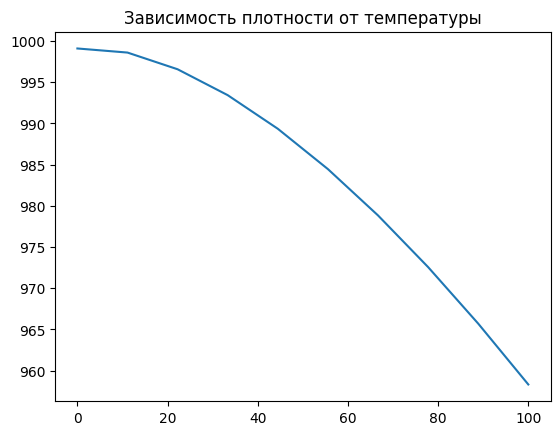

In [31]:
# построения графика функции зависимости плотности воды от температуры
x = np.linspace(0, 100, 10)                          # задание массива значений для построения графика
plt.plot(x, [calc_rho_w(0, t+273) for t in x])
plt.title('Зависимость плотности от температуры')
plt.show()

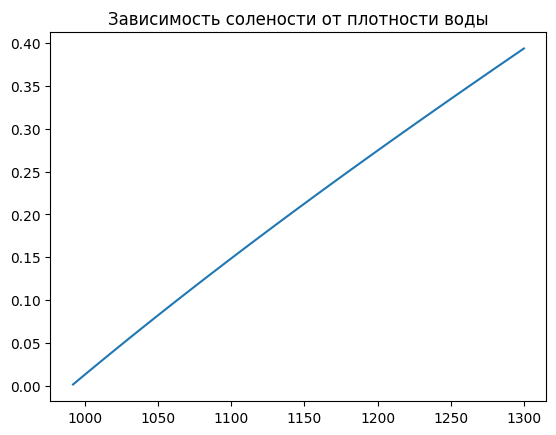

In [32]:
x = np.linspace(992, 1300, 50)                          # задание массива значений для построения графика
plt.plot(x, [calc_ws(gamma_wat/1000) for gamma_wat in x])
plt.title('Зависимость солености от плотности воды')
plt.show()

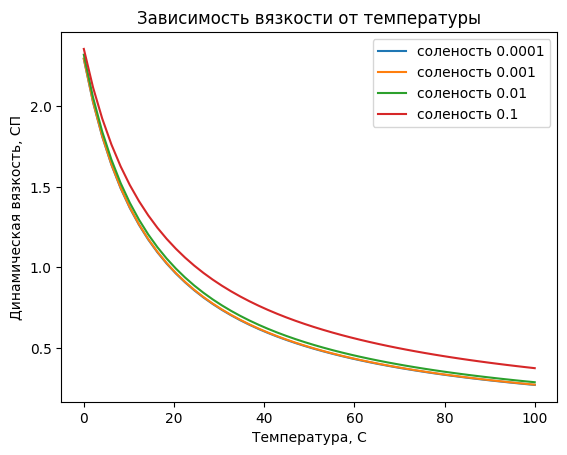

In [33]:
x = np.linspace(0, 100, 50)
plt.plot(x, [calc_mu_w(0.0001, t+273, 1*101325) for t in x], label = "соленость 0.0001")
plt.plot(x, [calc_mu_w(0.001, t+273, 1*101325) for t in x], label = "соленость 0.001")
plt.plot(x, [calc_mu_w(0.01, t+273, 1*101325) for t in x], label = "соленость 0.01")
plt.plot(x, [calc_mu_w(0.1, t+273, 1*101325) for t in x], label = "соленость 0.1")
plt.title('Зависимость вязкости от температуры')
plt.xlabel("Температура, С")
plt.ylabel("Динамическая вязкость, СП")
plt.legend()
plt.show()

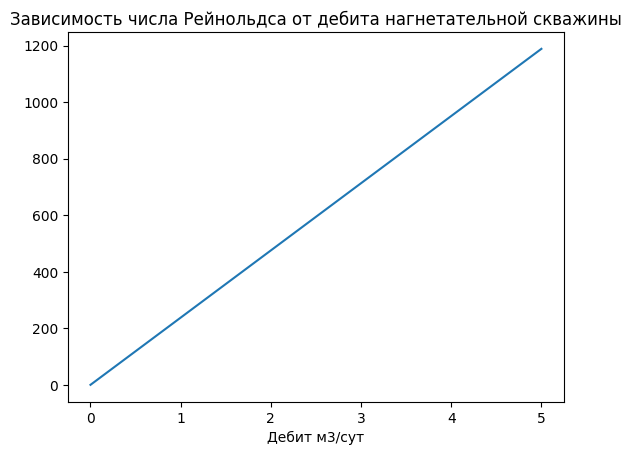

In [34]:
x = np.linspace(0, 5, 50)
plt.plot(x, [calc_n_re(rho_w=1000, q_ms=t/86400, mu_w=1, d_tub=0.062) for t in x])
plt.title('Зависимость числа Рейнольдса от дебита нагнетательной скважины')
plt.xlabel("Дебит м3/сут")
plt.show()

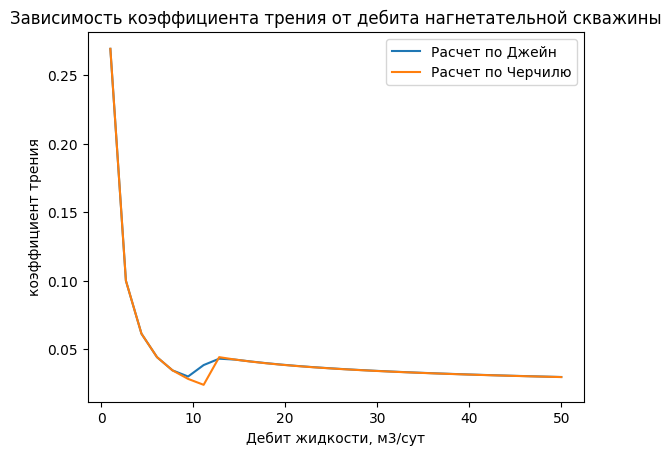

In [35]:
x = np.linspace(1, 50, 30)


n_re_list = [calc_n_re(rho_w=1000, q_ms=t/86400, mu_w=1, d_tub=0.062) for t in x]

plt.plot(x, [calc_ff_churchill(t, 0.0001, 0.62) for t in n_re_list], label ="Расчет по Джейн")
plt.plot(x, [calc_ff_jain(t, 0.0001, 0.62) for t in n_re_list], label ="Расчет по Черчилю")
plt.title('Зависимость коэффициента трения от дебита нагнетательной скважины')
plt.xlabel("Дебит жидкости, м3/сут")
plt.ylabel("коэффициент трения")
plt.legend()
plt.show()

На графике зависимости коэффициента трения Муди показаны расчеты выполненные с использованием корреляций Джейна и Черчиля. Видно что корреляции хорошо совпадают друг с другом. Корреляция Черчиля описывает и ламинарный и турбулентный режимы работы

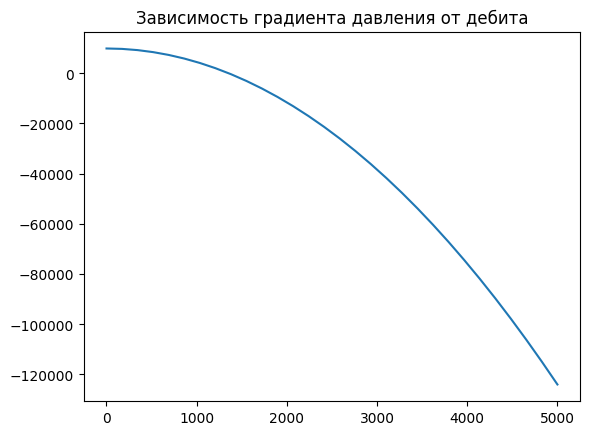

In [36]:
x = np.linspace(1, 5000, 30)
plt.plot(x, [calc_dp_dl(rho_w=1000, mu_w=1, angle=90, q_ms=t/86400, d_tub=0.062, roughness=0.001) for t in x])
plt.title('Зависимость градиента давления от дебита')
plt.show()

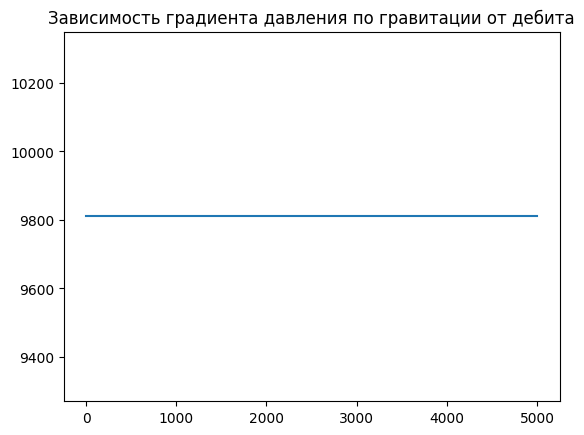

In [37]:
x = np.linspace(1, 5000, 30)
plt.plot(x, [calc_dp_dl_grav(rho_w=1000, angle=90) for t in x])
plt.title('Зависимость градиента давления по гравитации от дебита')
plt.show()

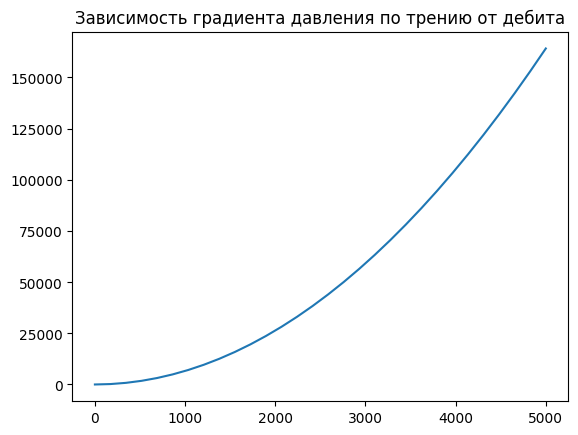

In [38]:
x = np.linspace(1, 5000, 30)
plt.plot(x, [calc_dp_dl_fric(rho_w=1000, mu_w=1, q_ms=t/86400, d_tub=0.062, roughness=0.001) for t in x])
plt.title('Зависимость градиента давления по трению от дебита')
plt.show()

# Расчет распределения давления
Для расчета необходимо задать исходные данные и перезапустить расчет

Решение уравнения на распределение давления и температуры в стволе скважины. Решается система двух уравнений вида

$$ \frac{dP}{dL} = \frac{1}{10^{-5}} \left [  \rho g  \cos \alpha  - 0.815 \frac{f \rho}{d^5} q ^ 2  \right ]  $$

$$ \frac{dT}{dL} = geograd $$

Граничные условия задаются на устье скважины


In [39]:
import math as mt
def __integr_func(
        h: float,
        pt: tuple,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
):
    """
    Функция для интегрирования трубы

    :param h: текущая глубина, м
    :param pt: текущее давление, Па и текущая температура, К
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиенты давления, Па/м и температуры, К/м
    """
    ws = calc_ws(gamma_wat)
    if q_ms!= 0 :
      P_func = lambda t, p: (
    calc_rho_w(ws,t)*9.81*mt.cos(mt.pi*(90-angle)/180)-0.815*((calc_ff_jain(calc_n_re(calc_rho_w(ws,t), q_ms,calc_mu_w(ws,t,p),d_tub),roughness,d_tub)*calc_rho_w(ws,t))/(d_tub**5))*q_ms**2
    )
    else:
      P_func = lambda t, p: (
    calc_rho_w(ws,t)*9.81*mt.cos(mt.pi*(90-angle)/180)
    )

    delta = 1

    p, t, z = pt[0], pt[1], 0
    p_list = [pt[0]]
    t_list = [pt[1]]
    h_list = [0]

    for i in range(int(round(h/delta,0))):
        k1 = delta*P_func(t, p)
        m1 = delta*temp_grad/100
        #print("k1",k1)
        #print("m1",m1)
        k2 = delta*P_func(t+1/2*m1, p+1*k1/2)
        m2 = delta*temp_grad/100
        #print("k2",k2)
        #print("m2",m2)
        k3 = delta*P_func(t+1/2*m2, p+1*k2/2)
        m3 = delta*temp_grad/100
        #print("k4",k3)
        #print("m3",m3)
        k4 = delta*P_func(t+1*m3, p+1*k3)
        m4 = delta*temp_grad/100
        #print("k4",k4)
        #print("m",m4)
        p += 1/6 * (k1+2*k2+2*k3+k4)
        #print("p",p)
        #print('t',t)
        #print('z',z)
        t += 1/6 * (m1+2*m2+2*m3+m4)
        z += delta
        p_list.append(p)
        t_list.append(t)
        h_list.append(z)
    #print(Height)
    return p_list, t_list,h_list

def calc_pipe(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
):

    grad_p_list, grad_t_list, h_list = __integr_func(md_vdp,(p_wh,t_wh),temp_grad,gamma_wat,angle,q_ms,d_tub,roughness)
    p_list = []
    t_list = []

    for i in range(len(grad_p_list)):
        p_list.append(grad_p_list[i]/101325)
        t_list.append(grad_t_list[i]-273)

    return p_list, t_list, h_list
    """
    Функция для расчета давления в трубе

    :param p_wh: буферное давление, Па
    :param t_wh: температура жидкости у буферной задвижки, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: давление, Па и температура, K, глубины
    """



def calc_p_wf(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        angle: float,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> float:
    p_list, t_list, H_list = calc_pipe(p_wh, t_wh, h0, md_vdp, temp_grad, gamma_wat, angle, q_ms, d_tub, roughness)
    P_wf = p_list[-1]
    return P_wf
    """
    Функция для расчета давления на забое скважины

    :param p_wh: буферное давление, Па
    :param t_wh: температура жидкости у буферной задвижки, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param angle: угол наклона скважины к горизонтали, градусы
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: давление на забое скважины, Па
    """
   # ...

In [40]:
#Исходные данные
#Q = 800 # дебит флюида, м3/cут
#q_m3_sec = Q / 86400 # дебит флюида, м3/c
#gamma_water = 1.015 # относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм
#H = 2500 # измеренная глубина забоя скважины
#d_tub = 0.068 # диаметр НКТ, м
#angle = 90 # угол наклона скважины к горизонтали, градусы
#roughness = 0.0001 # шероховатость трубы, м
#p_wh = 100 * 101325 # давление на устье, атм
#t_wh = 34 # температура на устье скважины, С
##temp_grad = 3 # геотермический градиент, К/м * (1e-2)

import json

with open('1.json') as json_file:
    data = json.load(json_file)

Q = 390 # дебит флюида, м3/cут
q_m3_sec = Q / 86400 # дебит флюида, м3/c
gamma_water = data['gamma_water'] # относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм
H = data['md_vdp'] # измеренная глубина забоя скважины
d_tub = data['d_tub'] # диаметр НКТ, м
angle = data['angle'] # угол наклона скважины к горизонтали, градусы
roughness = data['roughness'] # шероховатость трубы, м
p_wh = data['p_wh'] * 101325 # давление на устье, атм
t_wh = data['t_wh'] # температура на устье скважины, С
temp_grad = data['temp_grad'] # геотермический градиент, К/м * (1e-2)


In [41]:
results = calc_pipe(p_wh, t_wh+273, h0=0, md_vdp=H, temp_grad=temp_grad, gamma_wat=gamma_water, angle=angle, q_ms=q_m3_sec, d_tub=d_tub, roughness=roughness)
results
p_res = results[0]
t_res = results[1]
h_res = results[2]
#P_bottom = calc_p_wf(p_wh, t_wh+273, h0=0, md_vdp=H, temp_grad=temp_grad, gamma_wat=gamma_water, angle=angle, q_ms=q_m3_sec, d_tub=d_tub, roughness=roughness)
#print(P_bottom)
Q_list = [i for i in range(0,400,10)]
Pwf_list = [calc_p_wf(p_wh, t_wh+273, h0=0, md_vdp=H, temp_grad=temp_grad, gamma_wat=gamma_water, angle=angle, q_ms=(QQ/86400), d_tub=d_tub, roughness=roughness) for QQ in Q_list]


output_data = {
        "q_liq": Q_list,
        "p_wf": Pwf_list
    }
with open(("output.json"), "w") as output_file:
        json.dump(output_data, output_file, indent=4)

In [42]:
Pwf_list

[402.2954466872621,
 402.2939005647705,
 402.2860382004135,
 402.2763441603346,
 402.2636484052423,
 402.24804003339034,
 402.2295750251024,
 402.2082917006466,
 402.18421781555224,
 402.15737430627524,
 402.12777746076205,
 402.0954402638855,
 402.060373275345,
 402.022585226211,
 401.98208343786155,
 401.9388741244125,
 401.89296261613396,
 401.8443535278474,
 401.79305088806615,
 401.7390582395561,
 401.6823787186809,
 401.62301511882595,
 401.5609699415757,
 401.4962454384866,
 401.4288436454268,
 401.3587664110964,
 401.2860154208495,
 401.21059221673653,
 401.1324982145045,
 401.05173471806904,
 400.9683029319063,
 400.8822039717464,
 400.7934388738091,
 400.7020086028456,
 400.60791405914546,
 400.5111560847017,
 400.41173546860614,
 400.3096529518348,
 400.20490923147383,
 400.0975049644947]

In [43]:
p_res[-1]

400.0975049644947

In [44]:

#t_res

In [45]:
#h_res

Построение графика распределения давления

Text(0.5, 1.0, 'Распределение давления')

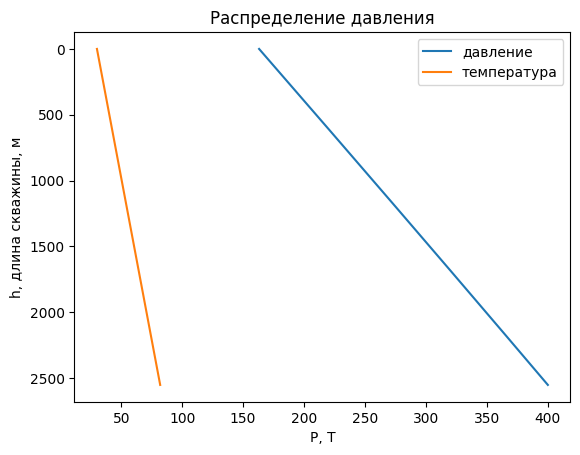

In [46]:
plt.plot(p_res, h_res, label ="давление")
plt.plot(t_res, h_res, label ="температура")
plt.xlabel("P, Т")
plt.ylabel("h, длина скважины, м")
ax = plt.gca()
ax.invert_yaxis()
plt.legend()
plt.title("Распределение давления")

Text(0.5, 1.0, 'Распределение давления')

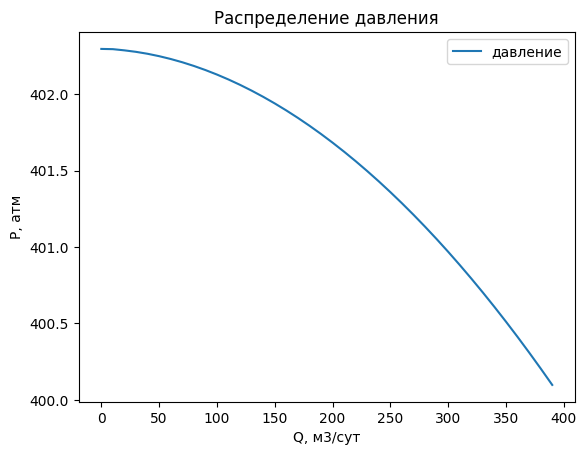

In [47]:
plt.plot(Q_list, Pwf_list, label ="давление")

plt.ylabel("P, атм")
plt.xlabel("Q, м3/сут")
ax = plt.gca()
#ax.invert_yaxis()
plt.legend()
plt.title("Распределение давления")

# Инклинометрия скважины

In [48]:
def calc_sin_angle(md1: float, md2: float, incl:dict) -> float:
    """
    Расчет синуса угла с горизонталью по интерполяционной функции скважины

    Parameters
    ----------
    :param md1: measured depth 1, м
    :param md2: measured depth 2, м

    :return: синус угла к горизонтали
    """
    md = incl["md"]
    tvd = incl["tvd"]
    tube_func = interp1d(md, tvd, fill_value="extrapolate")
    return min((tube_func(md2) - tube_func(md1)) / (md2 - md1), 1)

def calc_angle(md1, incl):
    """
    Функция для расчета угла наклона трубы в точке

    :param md1: measured depth 1, м
    """

    md2 = md1 + 0.0001
    return np.degrees(np.arcsin(calc_sin_angle(md1, md2, incl)))

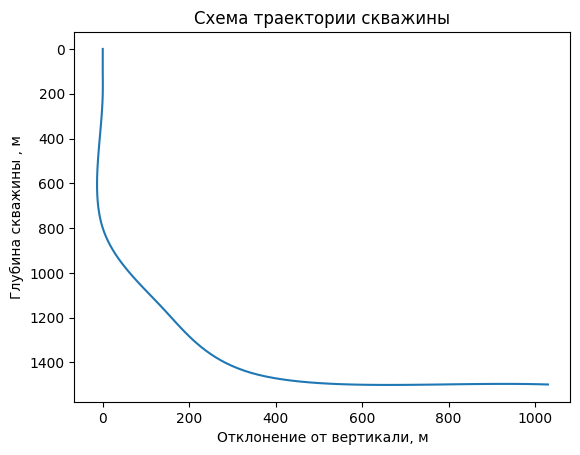

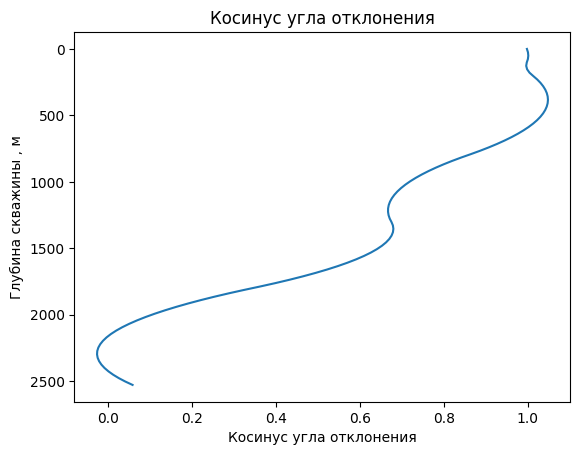

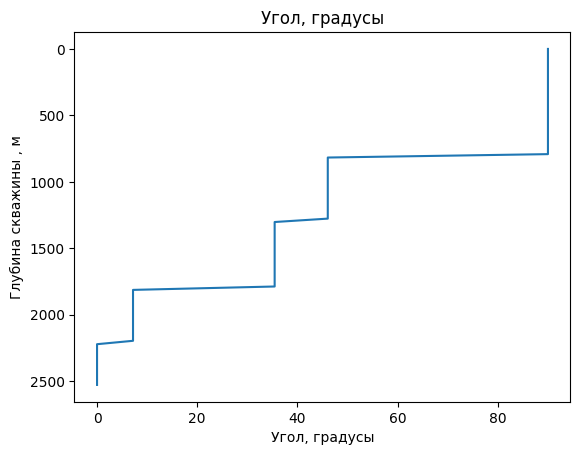

In [49]:

# траектория скважины, задается как массив измеренных глубин и значений отклонения от вертикали
h_md_ar_m = np.array([0,50,100,200,800,1300,1800,2200,H])
h_tvd_ar_m = np.array([0,50,100,200,800,1160,1450,1500,1500])

# Подготовка данных по конструкции скважины
# удлинение от измеренной длины - для отрисовки графика
udl_m = interp1d(h_md_ar_m, h_md_ar_m-h_tvd_ar_m, kind='cubic')

# вертикальная глубина от измеренной
h_tvd_m = interp1d(h_md_ar_m, h_tvd_ar_m, kind='cubic')

# построим массив углов отклонения от вертикали
ang = np.arccos(np.diff(h_tvd_ar_m)/np.diff(h_md_ar_m))
# угол от измеренной глубины
ang_rad = interp1d(h_md_ar_m[:-1], ang)
cos_ang1_rad = lambda h: ((h_tvd_m(h+1)-h_tvd_m(h)) ) #if h > 1 else  np.arccos((h_tvd_m(h+1)-h_tvd_m(h)) )


# готовим данные для отрисовки графика
h_ = np.linspace(0, H-25, num=100, endpoint=True)
plt.plot(udl_m(h_), h_tvd_m(h_), '-')
plt.xlabel("Отклонение от вертикали, м")
plt.ylabel("Глубина скважины , м")
plt.title("Схема траектории скважины")
ax = plt.gca()
ax.invert_yaxis()
plt.show()
plt.plot(cos_ang1_rad(h_), (h_), '-')
plt.xlabel("Косинус угла отклонения")
plt.ylabel("Глубина скважины , м")
plt.title("Косинус угла отклонения")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

incl = {
    "md": h_md_ar_m,
    "tvd": h_tvd_ar_m
}

angle = [calc_angle(h, incl) for h in h_]
plt.plot(angle, (h_), '-')
plt.xlabel("Угол, градусы")
plt.ylabel("Глубина скважины , м")
plt.title("Угол, градусы")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

In [50]:
def calc_sin_angle(md1: float, md2: float, incl:dict) -> float:
    """
    Расчет синуса угла с горизонталью по интерполяционной функции скважины

    Parameters
    ----------
    :param md1: measured depth 1, м
    :param md2: measured depth 2, м

    :return: синус угла к горизонтали
    """
    md = incl["md"]
    tvd = incl["tvd"]
    tube_func = interp1d(md, tvd, fill_value="extrapolate")
    return min((tube_func(md2) - tube_func(md1)) / (md2 - md1), 1)

def calc_angle(md1, incl):
    """
    Функция для расчета угла наклона трубы в точке

    :param md1: measured depth 1, м
    """

    md2 = md1 + 0.001
    return np.degrees(np.arcsin(calc_sin_angle(md1, md2, incl)))


def __integr_func_incl(
        h: float,
        pt: tuple,
        temp_grad: float,
        gamma_wat: float,
        incl: dict,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для интегрирования трубы

    :param h: текущая глубина, м
    :param pt: текущее давление, Па и текущая температура, К
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param incl:
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: градиенты давления, Па/м и температуры, К/м
    """
    ws = calc_ws(gamma_wat)

    P_func = lambda t, p, h_tek: (
    calc_rho_w(ws,t)*9.81*mt.cos(mt.pi*(abs(90-calc_angle(h_tek,incl))/180))-0.815*((calc_ff_jain(calc_n_re(calc_rho_w(ws,t), q_ms,calc_mu_w(ws,t,p),d_tub),roughness,d_tub)*calc_rho_w(ws,t))/(d_tub**5))*q_ms**2
    )

    delta = 1

    p, t, z, h_tek = pt[0], pt[1], 0 , 0
    p_list = [pt[0]]
    t_list = [pt[1]]
    h_list = [0]

    for i in range(int(round(h/delta,0))):
        k1 = delta*P_func(t, p, h_tek)
        m1 = delta*temp_grad/100
        #print("k1",k1)
        #print("m1",m1)
        k2 = delta*P_func(t+1/2*m1, p+1*k1/2, h_tek)
        m2 = delta*temp_grad/100
        #print("k2",k2)
        #print("m2",m2)
        k3 = delta*P_func(t+1/2*m2, p+1*k2/2, h_tek)
        m3 = delta*temp_grad/100
        #print("k4",k3)
        #print("m3",m3)
        k4 = delta*P_func(t+1*m3, p+1*k3,h_tek)
        m4 = delta*temp_grad/100
        #print("k4",k4)
        #print("m",m4)
        p += 1/6 * (k1+2*k2+2*k3+k4)
        #print("p",p)
        #print('t',t)
        #print('z',z)
        t += 1/6 * (m1+2*m2+2*m3+m4)
        h_tek += delta

        p_list.append(p)
        t_list.append(t)
        h_list.append(h_tek)
    #print(Height)
    return p_list, t_list,h_list

def calc_pipe_incl(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        incl: dict,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> tuple:
    """
    Функция для расчета давления в трубе

    :param p_wh: буферное давление, Па
    :param t_wh: температура жидкости у буферной задвижки, К
    :param h0: начальная глубина, м
    :param md_vdp: глубина верхних дыр перфорации, м
    :param temp_grad: геотермический градиент, К/м * (1e-2)
    :param gamma_wat: относительная плотность по пресной воде с плотностью 1000 кг/м3, безразм.
    :param incl:
    :param q_ms: дебит жидкости, м3/с
    :param d_tub: диаметр НКТ, м
    :param roughness: шероховатость стен трубы, м

    :return: давление, Па и температура, K, глубины
    """
    grad_p_list, grad_t_list, h_list = __integr_func_incl(md_vdp,(p_wh,t_wh),temp_grad,gamma_wat,incl,q_ms,d_tub,roughness)
    p_list = []
    t_list = []

    for i in range(len(grad_p_list)):
        p_list.append(grad_p_list[i]/101325)
        t_list.append(grad_t_list[i]-273)

    return p_list, t_list, h_list

def calc_p_wf_incl(
        p_wh: float,
        t_wh: float,
        h0: float,
        md_vdp: float,
        temp_grad: float,
        gamma_wat: float,
        incl: dict,
        q_ms: float,
        d_tub: float,
        roughness: float
) -> float:
    p_list, t_list, H_list = calc_pipe_incl(p_wh, t_wh, h0, md_vdp, temp_grad, gamma_wat, incl, q_ms, d_tub, roughness)
    P_wf = p_list[-1]
    return P_wf



In [51]:
#h_md_ar_m = np.array([0,H])
#h_tvd_ar_m = np.array([0,mt.sin(mt.pi*(data['angle'])/180)*H])
h_md_ar_m = np.array([0,50,100,200,800,1300,1800,2200,H])
h_tvd_ar_m = np.array([0,50,100,200,800,1160,1450,1500,1500])
incl = {
    "md": h_md_ar_m,
    "tvd": h_tvd_ar_m
}

In [52]:
results = calc_pipe_incl(p_wh, t_wh+273, h0=0, md_vdp=H, temp_grad=temp_grad, gamma_wat=gamma_water, incl=incl, q_ms=q_m3_sec, d_tub=d_tub, roughness=roughness)
p_res = results[0]
t_res = results[1]
h_res = results[2]


Построение графика распределения давления

Text(0.5, 1.0, 'Распределение давления')

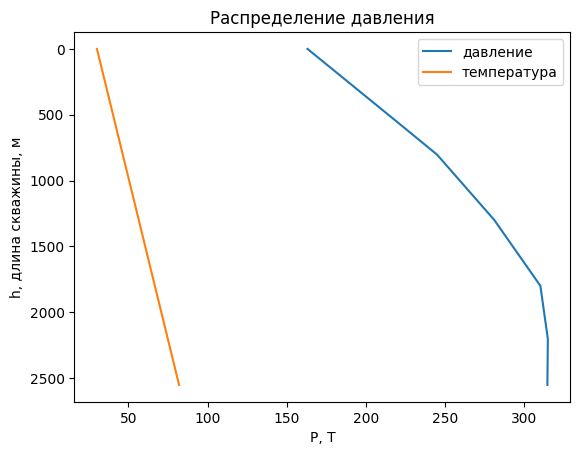

In [53]:
plt.plot(p_res, h_res, label ="давление")
plt.plot(t_res, h_res, label = "температура")
plt.xlabel("P, Т")
plt.ylabel("h, длина скважины, м")
ax = plt.gca()
ax.invert_yaxis()
plt.legend()
plt.title("Распределение давления")

Text(0.5, 1.0, 'Распределение давления')

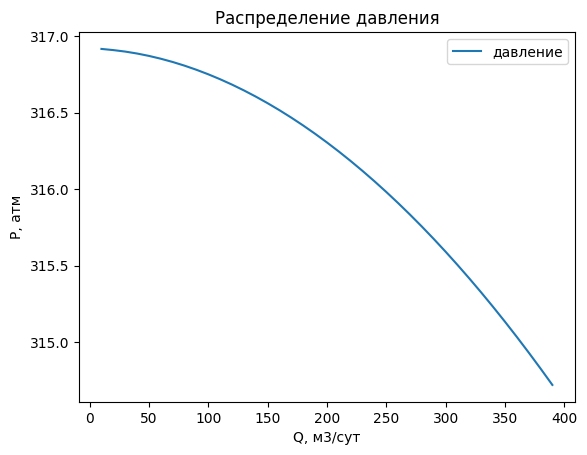

In [54]:
Q_list = [i for i in range(10,400,10)]
Pwf_list = [calc_p_wf_incl(p_wh, t_wh+273, h0=0, md_vdp=H, temp_grad=temp_grad, gamma_wat=gamma_water, incl = incl, q_ms=(QQ/86400), d_tub=d_tub, roughness=roughness) for QQ in Q_list]
plt.plot(Q_list, Pwf_list, label ="давление")

plt.ylabel("P, атм")
plt.xlabel("Q, м3/сут")
ax = plt.gca()
#ax.invert_yaxis()
plt.legend()
plt.title("Распределение давления")